<a href="https://colab.research.google.com/github/Edisinsky/SVM-ANN/blob/main/SVM_%26_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.svm import SVR #Para una regresión se Usa un Support Vector Regresor (SVR)
from sklearn.svm import SVC #Para una clasificación se Usa un Support Vector Classifier (SVC)
import missingno as msno


# Información General de los Datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

<Axes: >

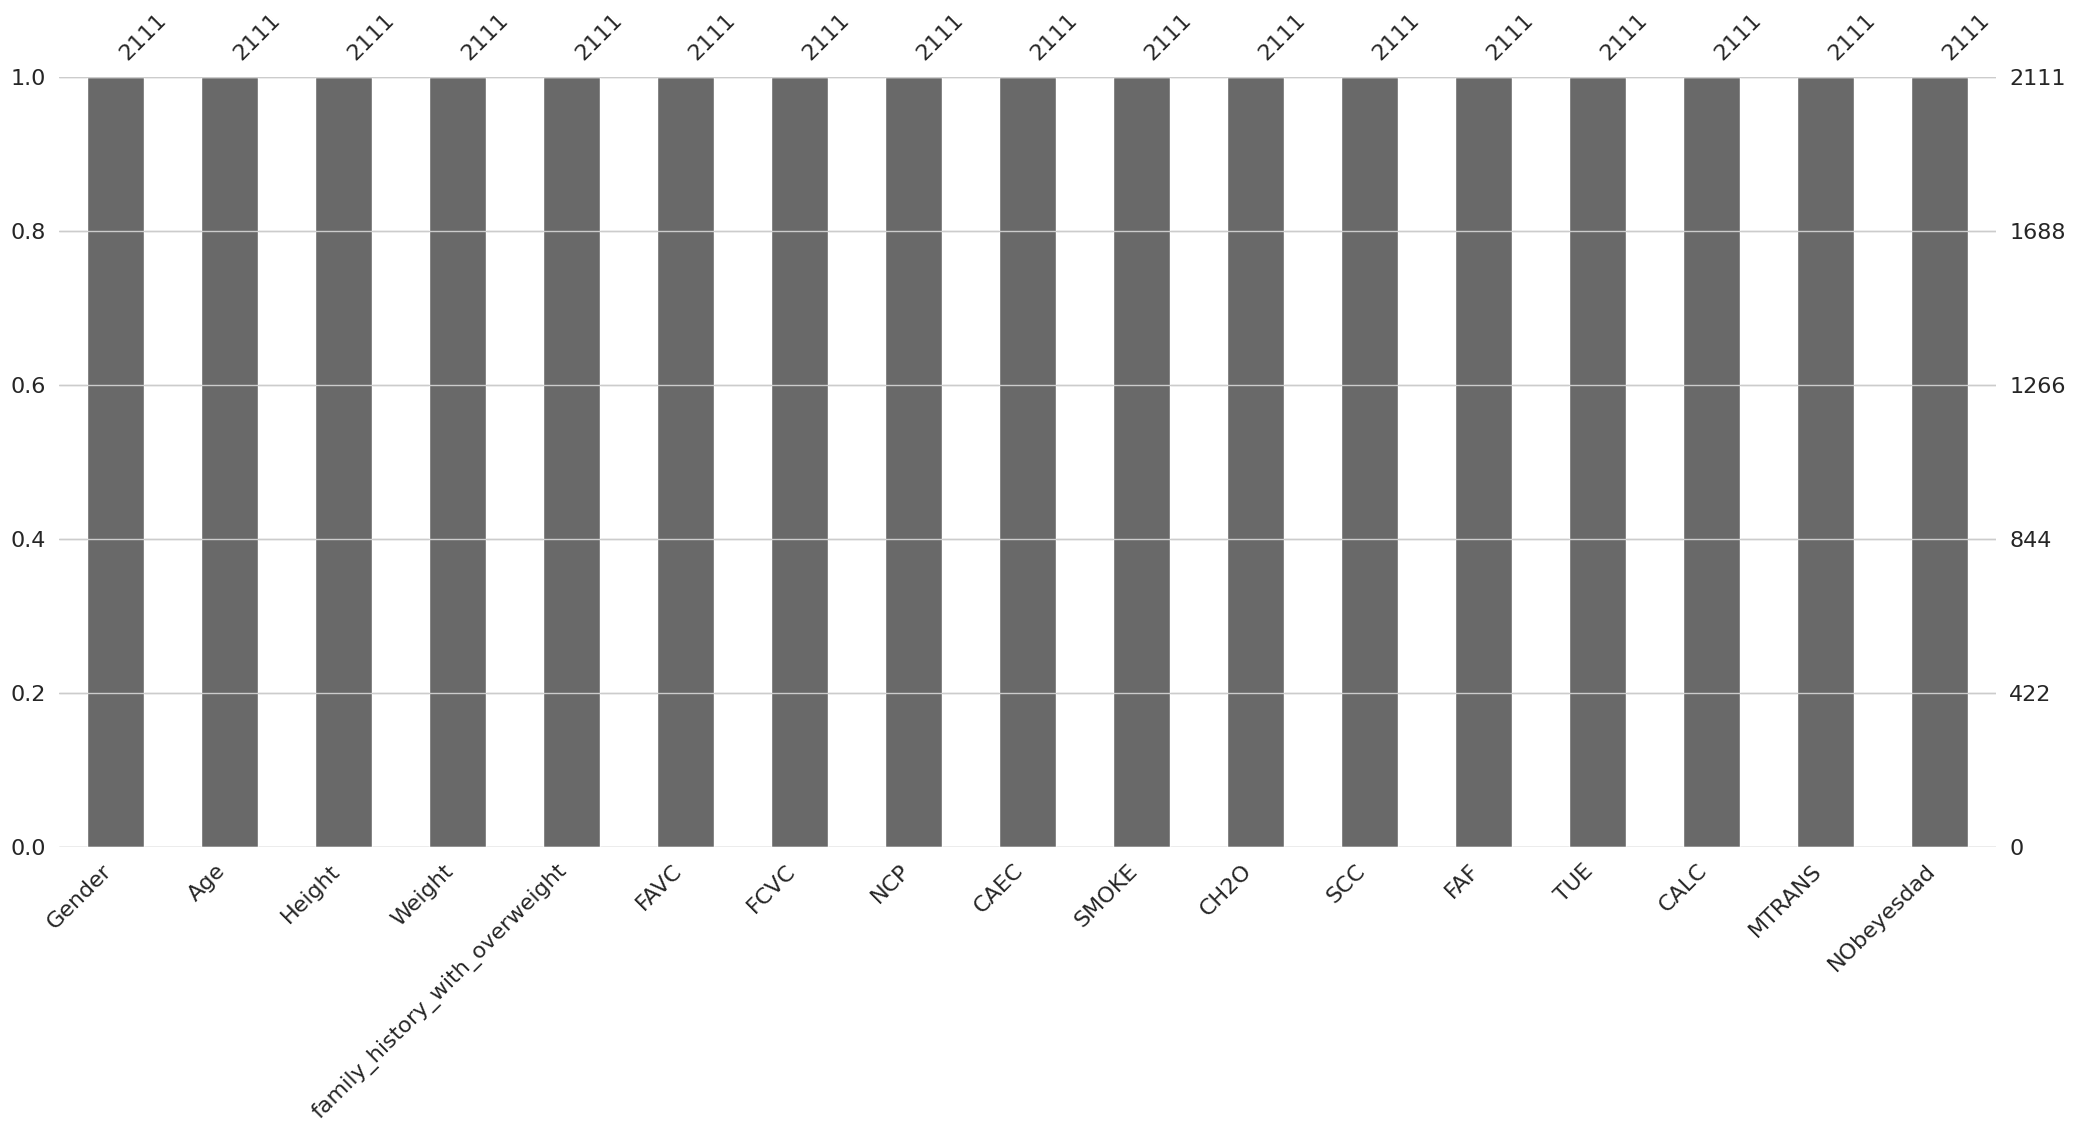

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ObesityDataSet.csv')
df.info(pd.notnull)
df.head()
msno.bar(df)

In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


# Transformacion de elementos tipo Object

In [ ]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['family_history_with_overweight']=le.fit_transform(df['family_history_with_overweight'])
df['FAVC']=le.fit_transform(df['FAVC'])
df['CAEC']=le.fit_transform(df['CAEC'])
df['SMOKE']=le.fit_transform(df['SMOKE'])
df['SCC']=le.fit_transform(df['SCC'])
df['CALC']=le.fit_transform(df['CALC'])
df['MTRANS']=le.fit_transform(df['MTRANS']) #Se transforma todas las variables object excepto la variable a evaluar

In [ ]:
X = df.drop('NObeyesdad', axis=1) #Se define el 'X' y el 'y' de la variable a evaluar
y = df['NObeyesdad']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

# Pearson



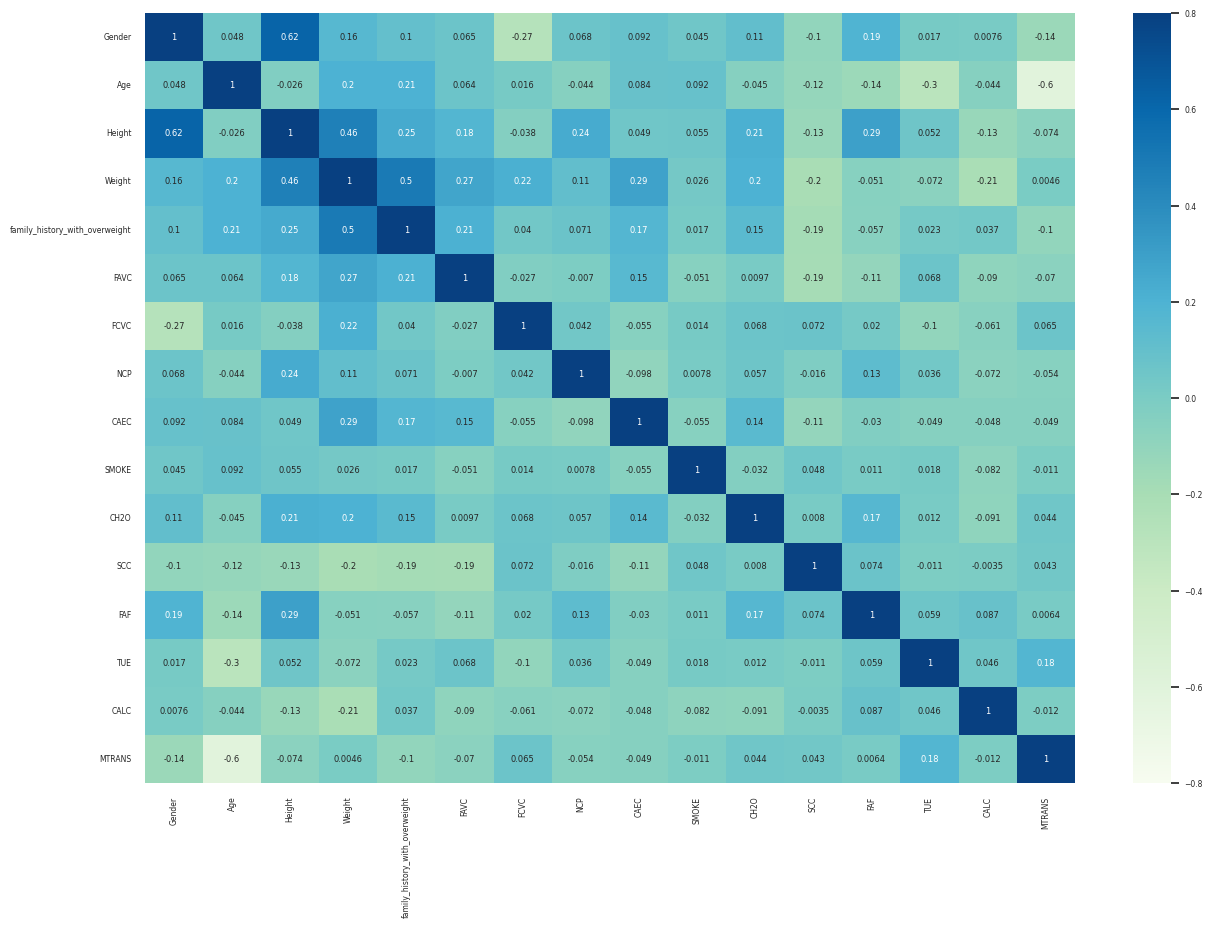

In [ ]:
sns.set(style="whitegrid", font_scale=0.5)
plt.figure(figsize=(15, 10))
sns.heatmap(X.corr(), annot=True, cmap="GnBu", vmin=-0.8, vmax=0.8)
plt.show()

In [ ]:
df  = df.drop(['SMOKE'], axis=1) #Esta variable no parece aportar nada

# Histogramas

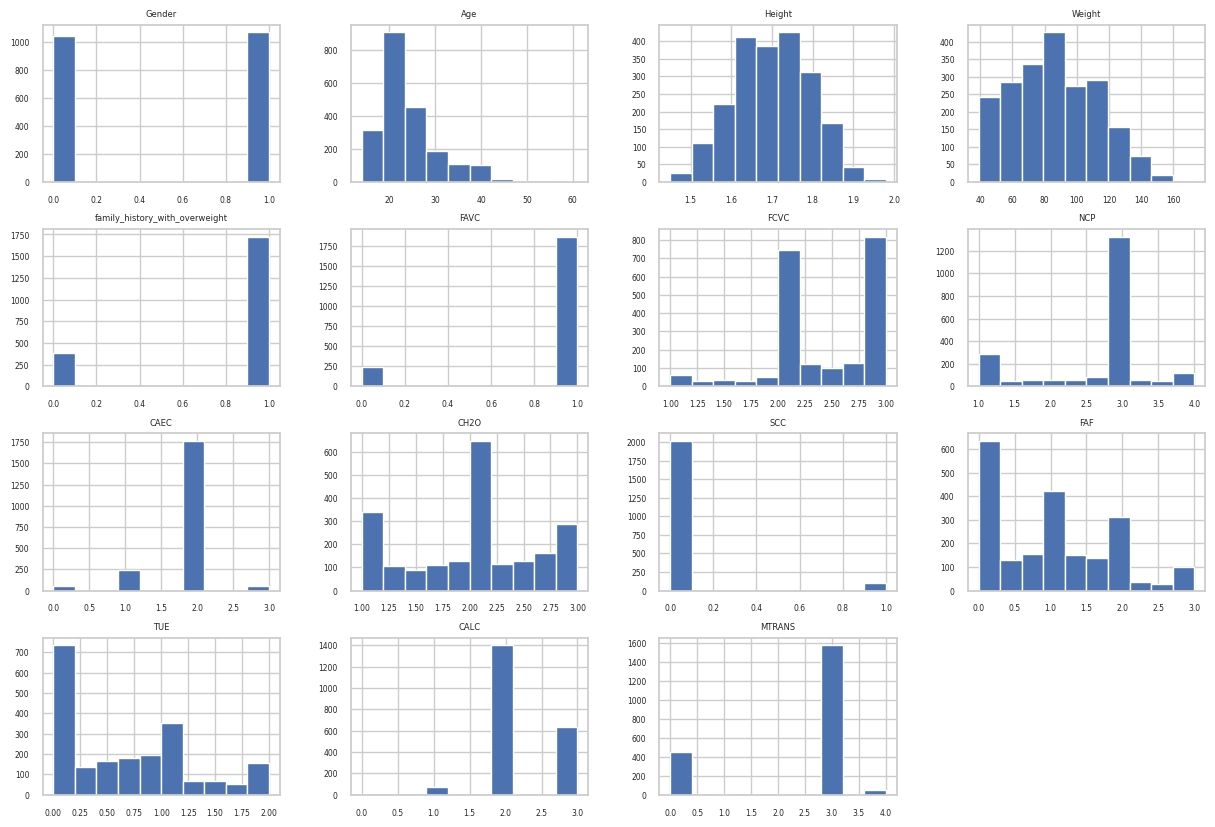

In [ ]:
df.hist(figsize=(15, 10)) #Se obtienen los histogramas para decidir cuál Kernel se va a usar
plt.show()

Se puede ver que todos los datos son lineales

# Atípicos

In [ ]:
for i in c:
  q1 = df[i].quantile(0.05)
  q4 = df[i].quantile(0.95)
  df[i][df[i]<=q1] = q1
  df[i][df[i]>=q4] = q4

<ipython-input-150-f44a8cc1618b>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[i][df[i]<=q1] = q1
<ipython-input-150-f44a8cc1618b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

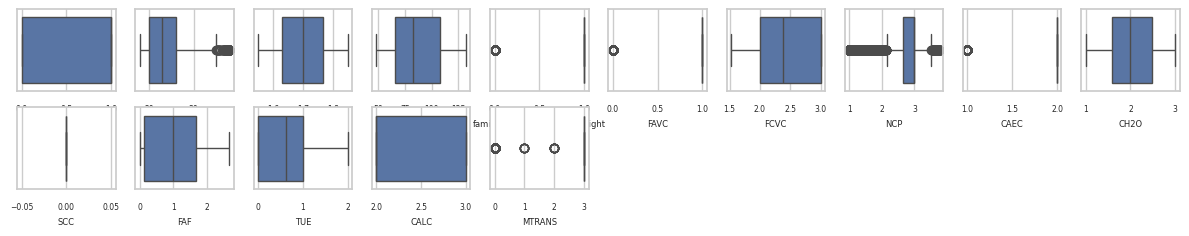

In [ ]:
plt.figure(figsize=(15, 10))
c = df.columns[:-1]
for i  in enumerate(c):
  plt.subplot(8, 10, i[0]+1)
  sns.boxplot(x=i[1],data=df)
plt.show()

# Entrenamiento del Modelo con SVM


In [ ]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
y #Al SVM no le interesa si la variable sigue siendo de tipo object
##(A diferencia de una red neuronal, la cual necesita el uso de dummies() para poder funcionar)

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [ ]:
SVM = SVC(kernel ='linear') #Se puede trabajar con linear, rbf, poly y sigmoid
#En este caso usar polinomial da más precisión pero aumenta el overfitting, a diferencia de un Linear
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.82      0.95      0.88        83
      Normal_Weight       0.81      0.61      0.70        83
     Obesity_Type_I       0.96      0.88      0.92        99
    Obesity_Type_II       0.92      0.98      0.95        89
   Obesity_Type_III       1.00      0.99      1.00       103
 Overweight_Level_I       0.70      0.86      0.77        79
Overweight_Level_II       0.83      0.77      0.80        98

           accuracy                           0.87       634
          macro avg       0.86      0.86      0.86       634
       weighted avg       0.87      0.87      0.86       634



In [ ]:
print(classification_report(y_train, SVM.predict(X_train)))

                     precision    recall  f1-score   support

Insufficient_Weight       0.85      0.97      0.91       189
      Normal_Weight       0.85      0.66      0.74       204
     Obesity_Type_I       0.97      0.93      0.95       252
    Obesity_Type_II       0.95      0.99      0.97       208
   Obesity_Type_III       1.00      1.00      1.00       221
 Overweight_Level_I       0.75      0.79      0.77       211
Overweight_Level_II       0.79      0.83      0.81       192

           accuracy                           0.88      1477
          macro avg       0.88      0.88      0.88      1477
       weighted avg       0.88      0.88      0.88      1477



In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 79,   4,   0,   0,   0,   0,   0],
       [ 17,  51,   0,   0,   0,  10,   5],
       [  0,   0,  87,   7,   0,   0,   5],
       [  0,   0,   2,  87,   0,   0,   0],
       [  0,   0,   0,   1, 102,   0,   0],
       [  0,   6,   0,   0,   0,  68,   5],
       [  0,   2,   2,   0,   0,  19,  75]])

In [ ]:
confusion_matrix(y_train, SVM.predict(X_train))

array([[183,   6,   0,   0,   0,   0,   0],
       [ 32, 134,   0,   0,   0,  32,   6],
       [  0,   0, 234,  10,   0,   0,   8],
       [  0,   0,   2, 205,   1,   0,   0],
       [  0,   0,   1,   0, 220,   0,   0],
       [  0,  15,   0,   0,   0, 167,  29],
       [  0,   2,   5,   0,   0,  25, 160]])

Diferencias entre Redes neuronales y SVM:

- En SVM se puede usar 1 solo kernel para toda la data
- En redes neuronales se obtienen mejor las caracteristicas ya  que se usan funciones de activacion por cada capa
-En redes neuronales se tienen que estructurar los datos de salida en base a las bases a diferencia de SVM donde se puede mantener el 'y' como Object


# Entrenamiento del Modelo con ANN

In [ ]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = pd.get_dummies(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [ ]:
ann = Sequential()
ann.add(Dense(units=6, activation='relu'))
ann.add(Dense(units=5, activation='relu'))
ann.add(Dense(units=7, activation='softmax'))
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size=5, epochs=100)

Epoch 1/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1199 - loss: 2.0140 - val_accuracy: 0.2303 - val_loss: 1.9437
Epoch 2/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2195 - loss: 1.9325 - val_accuracy: 0.2413 - val_loss: 1.8853
Epoch 3/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2280 - loss: 1.8686 - val_accuracy: 0.2650 - val_loss: 1.7842
Epoch 4/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2755 - loss: 1.7416 - val_accuracy: 0.3123 - val_loss: 1.6194
Epoch 5/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3193 - loss: 1.6168 - val_accuracy: 0.4069 - val_loss: 1.5228
Epoch 6/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4071 - loss: 1.5207 - val_accuracy: 0.4211 - val_loss: 1.4660
Epoch 7/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4180 - loss: 1.4742 - val_accuracy: 0.4227 - val_loss: 1.4199
Epoch 8/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4277 - loss: 1.4270 - val_accu

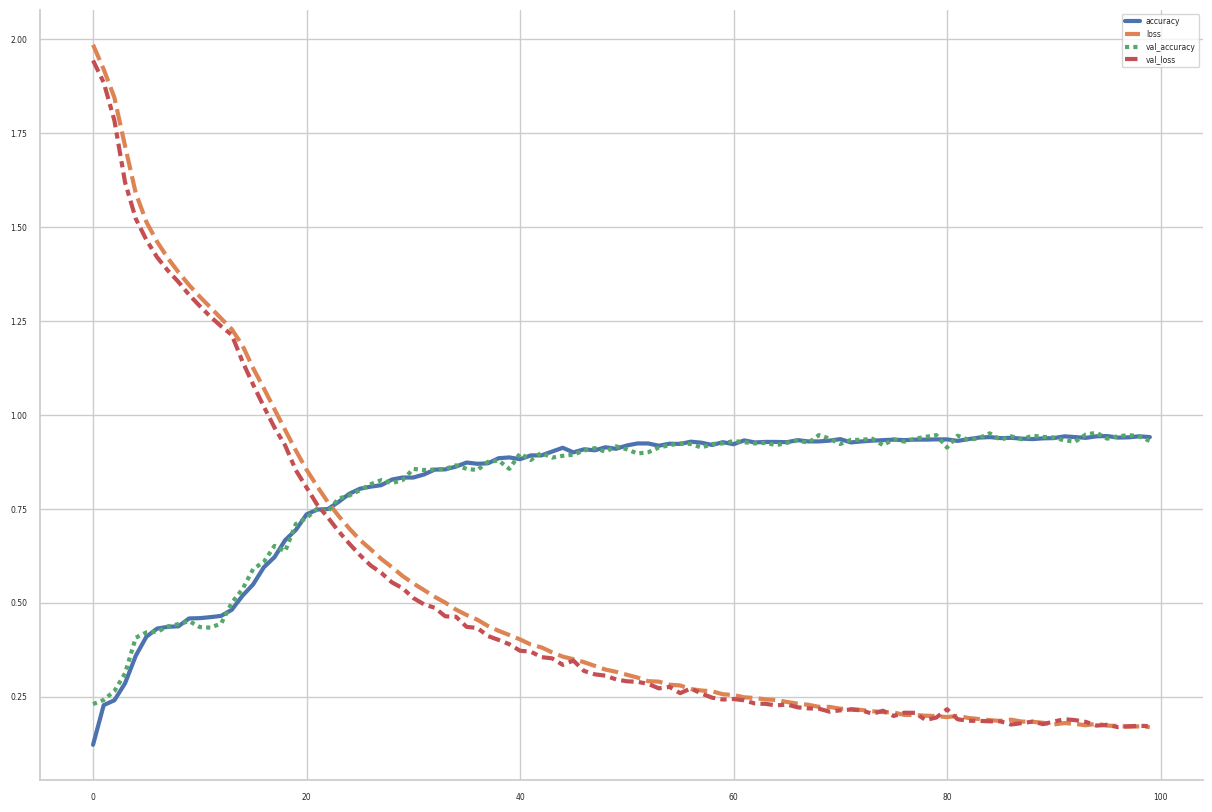

In [ ]:
loss= pd.DataFrame(ann.history.history)
plt.figure(figsize=(15, 10))
sns.lineplot(data=loss, lw=3)
sns.despine()
plt.show()